# Tutorial 1

In [322]:
import numpy as np 
import matplotlib.pyplot as plt 
from tqdm import tqdm
plt.rcParams.update({'font.size': 25 })
plt.rc('text', usetex=True)
plt.rc('font', family='serif')



## Problem 1

### Full exact Diagonalization implementation of  spin-$\frac{1}{2}$ 1D (chain) Heisenberg Model.

**Heisenberg hamiltonian with nearest-neighbour interaction**:   $$H = J\sum_{\langle i,j \rangle}S_{i}.S_{j}$$ where J > 0.

**Step 1**: Calculate Hilbert space dimension.

$$\mathcal{H}:(2s+1)^L$$

where $s=\frac{1}{2}$ and $L$ is the system size.

**Step 2**: Represent  states  using a list containing the information about spins (e.g. {0, 1, 0, 1} for a 4-spin lattice, 0 representing spin up and 1 representing spin down).
(itertools can be used to generate states)


**Step 3**: Fill the matrix elements: 

$$H^{ij}_d = J \big(s^z_is^z_j\big).$$
$$H^{ij}_{od} = \frac{J}{2} \big(s^+_is^-_j + s^-_is^+_j\big)$$

$$ \langle \ldots 0 \ldots 0 \ldots | H^{ij}_d | \ldots 0 \ldots 0 \ldots \rangle = +\frac{J}{4} $$

$$\langle \ldots 0 \ldots 1 \ldots | H^{ij}_{od} | \ldots 1 \ldots 0 \ldots \rangle = +\frac{J}{2} $$
, etc. as discussed in the class.

**Step 4**: Diagonalize using the python library "linalg.eig" (for symmetric or hermitian matrices).

$$\mathcal{H} = J\sum_{\langle ij\rangle}\left(S_i^zS_j^z + \frac{1}{2}(S_i^+S_j^- + S_i^-S_j^+)\right)$$

Each two-local term in the Hamiltonian can be dealt with separately, and the results can be added! Let us follow this strategy. Assuming _open_ boundary conditions.

In [340]:
def create_statedict(L,s=1/2):
    d = 2*s+1 #local Hilbert space dimension
    D = int(d ** L) #total Hilbert space direction
    states_dict = {}
    for i in range((D)):
        state = bin(i)[2:]
        state = '0'*(L-len(state)) + state 
        states_dict[i] = state 
    return states_dict
def flipbits(state,i,j):
    copystate = state 
    copystate = list(copystate)
    bit_i = state[i]
    bit_j = state[j]
    if bit_i == '0':
        copystate[i] = '1'
    else:
        copystate[i] = '0'
    if bit_j == '0':
        copystate[j] = '1'
    else:
        copystate[j] = '0'
    copystate = ''.join(copystate)
    return copystate

def heisen_hamil(L,J,state_dict,s=1/2,BC='closed'):
    d = 2*s+1 #local Hilbert space dimension
    D = int(d ** L) #total Hilbert space direction
    H = np.zeros((D,D))
    sites = L-2 if BC == 'open' else L-1
    for site in range(sites):
        #loop over i = 0,1,...,L-2 as there are total L-1 2-local terms in OBC
        for i in range(D):
                state = state_dict[i]
                #diagonal part
                s_site = 2 * int(state[site]) - 1
                s_nextsite = 2 * int(state[(site+1)%L]) - 1 
                H[i,i] += s_site * s_nextsite * 1/4

                #off-diagonal part
                if state[site] != state[(site+1)%L]:
                    nextstate = flipbits(state,site,(site+1)%L)
                    # print(site, state, nextstate)
                    j  = int(nextstate,2)
                    s_site_i = 2 * int(state[site]) - 1
                    s_nextsite_i = 2 * int(state[(site+1)%L]) - 1 
                    s_site_j = 2 * int(nextstate[site]) - 1
                    s_nextsite_j = 2 * int(nextstate[(site+1)%L]) - 1 
                    H[i,j] += 1/2
    return H

      


In [378]:
state_dict = create_statedict(L=8,s=1/2)
H = heisen_hamil(L=8,J=1,state_dict=state_dict)
np.all(H == np.conjugate(np.transpose(H)))

True

In [379]:
eigenvalues, eigenvectors = np.linalg.eig(H)

sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
actual_gs = sorted_eigenvectors[:,0]

Text(0.5, 1.0, 'Heisenberg Spin Chain Eigenspectrum')

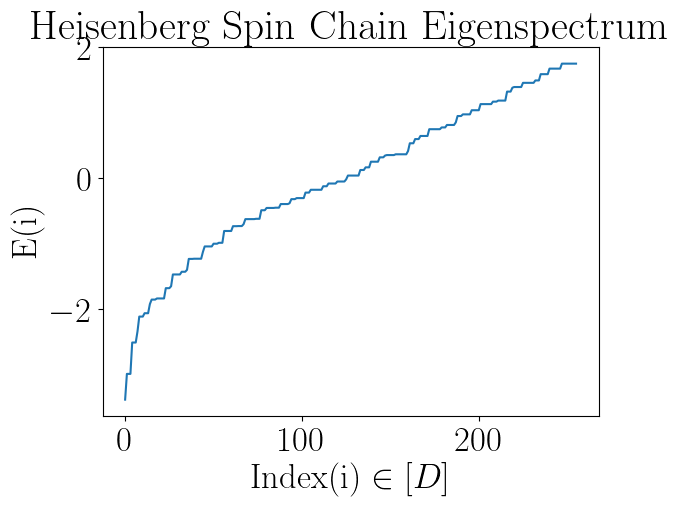

In [380]:
plt.plot(sorted_eigenvalues)
plt.xlabel('Index(i) $\in [D]$')
plt.ylabel('E(i)')
plt.title('Heisenberg Spin Chain Eigenspectrum')

Text(0.5, 1.0, 'Heisenberg Spin Chain G.S.')

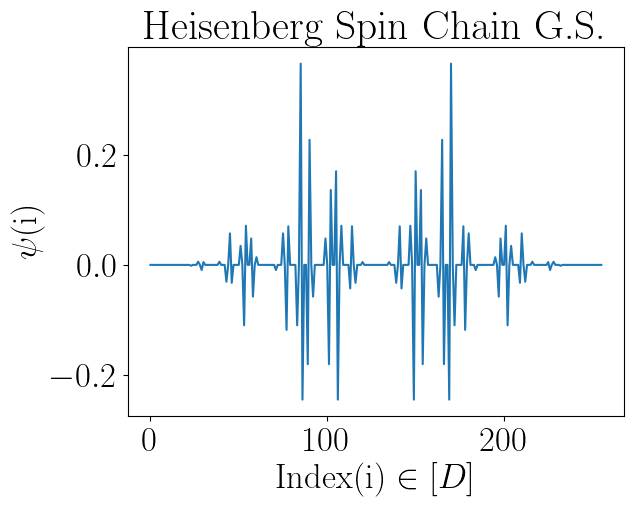

In [381]:
plt.plot(actual_gs)
plt.xlabel('Index(i) $\in [D]$')
plt.ylabel('$\psi$(i)')
plt.title('Heisenberg Spin Chain G.S.')

## Problem 2
### Power Method:

* Iterative method for eigenvalue problems (e.g. say L=8).
* Aim is to get the ground state eigenvalue and it's eigenvector.
* Can be useful when there is no symmetry in the Hamiltonian. 
* Compare the output from this method to what you obtained in the previous exercise.
* Recall that you may have to add an overall (negative) constant to the Hamiltonian so that the ground state eigenvalue has the largest magnitude.

Let $\ket{\psi}$ be an arbitrary state. Let the Hamiltonian be diagonalized as, 
$$\mathcal{H} = \sum_k \lambda_k\ket{k}\bra{k}$$
Decompose (can do as Hamiltonian is Hermitian),
$$\ket{\psi} = \sum_k c_k \ket{k}$$
Then, 
$$\mathcal{H}\ket{\psi} = \sum_k c_k \mathcal{H}\ket{k} = \sum_k c_k \lambda_k \ket{k}$$
and so on, 
$$\mathcal{H}^n\ket{\psi} = \sum_k c_k \mathcal{H}\ket{k} = \sum_k c_k \lambda_k^n \ket{k}$$
If $\lambda_0 > \lambda_1 > \dots$, then, 
$$\lim_{n\to\infty} \mathcal{H}^n\ket{\psi} \propto \ket{k=0}$$


In [382]:
s = 1/2 
d = 2*s+1 #local Hilbert space dimension
L = 8
D = int(d ** L) #total Hilbert space direction
start_state = np.random.normal(size=D)
for i in range(500):
    state = H @ start_state 
    state = state/np.linalg.norm(state)
    start_state = state 

Text(0.5, 1.0, 'G.S. v.s. Power method')

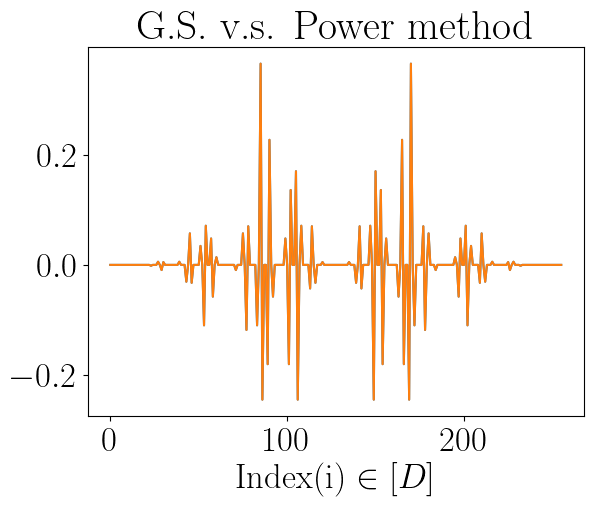

In [384]:
plt.plot(actual_gs)
plt.plot(start_state)
plt.xlabel('Index(i) $\in [D]$')
plt.title('G.S. v.s. Power method')

## Problem 3
### Full exact Diagonalization implementation of  spin-$\frac{1}{2}$ 1D, Majumdar-Ghosh model.


**This model have nearest-neighbour and next-nearest neighbour interaction**:   $$H = J_{1}\sum_{ i=1 }^{N}S_{i}.S_{i+1} + J_{2}\sum_{ i=1 }^{N}S_{i}.S_{i+2}$$  
where both $J_{1}$ and $J_{2}$ are positive.


* Make a plot of ground state energy as a function of $g=\frac{J_{2}}{J_{1}}$, where g varies from 0 to 1, for system size L=10 with both open and periodic boundary condition.
* More details about this model can be found in C. K. Majumdar and D. K. Ghosh, J. Math. Phys. 10, 1388 (1969), ibid., 1399 (1969), Computational Studies of Quantum Spin Systems Notes by Anders W. Sandvik(https://scholar.google.co.in/citations?view_op=view_citation&hl=en&user=IPi533gAAAAJ&citation_for_view=IPi533gAAAAJ:MXK_kJrjxJIC)



In [385]:
def MG_hamiltonian(L,J1,J2,state_dict,s=1/2,BC='closed'):

    s = 1/2 #spin 
    d = 2*s+1 #local Hilbert space dimension
    D = int(d ** L) #total Hilbert space direction
    H_2 = np.zeros((D,D))
    sites = L-2 if BC == 'open' else L-1
    for site in range(sites):
        #loop over i = 0,1,...,L-2 as there are total L-1 2-local terms in OBC
        for i in range(D):
                state = state_dict[i]
                #diagonal part of J1
                s_site = 2 * int(state[site]) - 1
                s_nextsite = 2 * int(state[(site+1)%L]) - 1 
                H_2[i,i] += s_site * s_nextsite * 1/4 * J1
                #diagonal part of J2
                s_site = 2 * int(state[site]) - 1
                s_nextsite = 2 * int(state[(site+2)%L]) - 1 
                H_2[i,i] += s_site * s_nextsite * 1/4 * J2


                #off-diagonal part of J1 
                if state[site] != state[(site+1)%L]:
                    nextstate = flipbits(state,site,(site+1)%L)
                    j  = int(nextstate,2)
                    H_2[i,j] += 1/2 * J1 

                #off-diagonal part of J12
                if state[site] != state[(site+2)%L]:
                    nextstate = flipbits(state,site,(site+2)%L)
                    j  = int(nextstate,2)
                    H_2[i,j] += 1/2 * J2
    return H_2

      


In [386]:
L = 10
g_arr = np.linspace(0,1,50)
gs_energy_arr = []
J1 = 1
state_dict = create_statedict(L,s=1/2)
for i, g in tqdm(enumerate(g_arr)):
    J2 = g * J1 
    hamil = MG_hamiltonian(L,J1,J2,state_dict,s=1/2,BC='closed')
    eigenvalues, eigenvectors = np.linalg.eig(hamil)
    sorted_indices = np.argsort(eigenvalues)
    sorted_eigenvalues = eigenvalues[sorted_indices]
    gs_energy_arr.append(sorted_eigenvalues[0])

50it [01:30,  1.82s/it]


# Closed BC

/Users/siddhantm/miniconda3/envs/qt/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Closed BC')

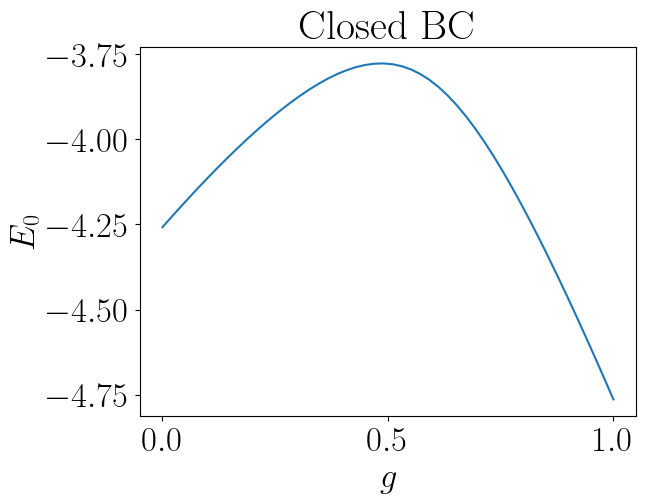

In [387]:
plt.plot(g_arr,gs_energy_arr)
plt.xlabel(r'$g$')
plt.ylabel(r'$E_0$')
plt.title('Closed BC')

In [388]:
L = 10
g_arr = np.linspace(0,1,50)
gs_energy_arr = []
J1 = 1
state_dict = create_statedict(L,s=1/2)
for i, g in tqdm(enumerate(g_arr)):
    J2 = g * J1 
    hamil = MG_hamiltonian(L,J1,J2,state_dict,s=1/2,BC='open')
    eigenvalues, eigenvectors = np.linalg.eig(hamil)
    sorted_indices = np.argsort(eigenvalues)
    sorted_eigenvalues = eigenvalues[sorted_indices]
    gs_energy_arr.append(sorted_eigenvalues[0])

50it [01:26,  1.73s/it]


# Open BC

/Users/siddhantm/miniconda3/envs/qt/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Open BC')

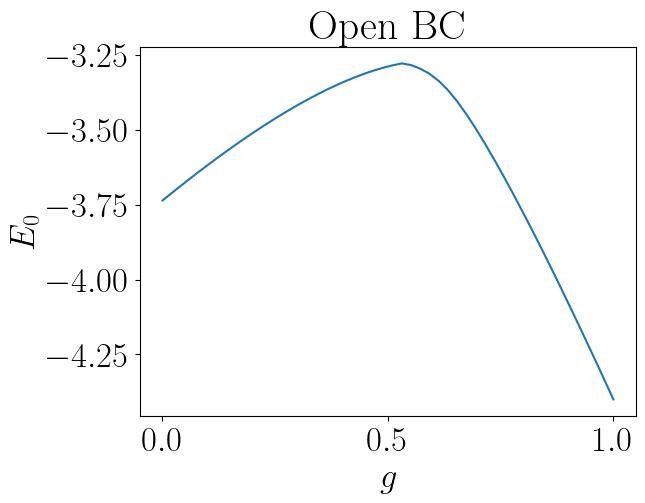

In [389]:
plt.plot(g_arr,gs_energy_arr)
plt.xlabel(r'$g$')
plt.ylabel(r'$E_0$')
plt.title('Open BC')